<a href="https://colab.research.google.com/github/henry18tw/test-excel/blob/main/Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
import xgboost as xgb

In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# 引進各類Classifier進行嘗試
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

import csv


In [4]:
df = pd.read_csv('../content/Train_data2.csv')
df.head()

,alert_key,alert_date,sar_flag,cust_id,risk_rank,occupation_code,total_asse,AGE,Pay_amount,Usage_duration,...,TR_money_amount,CR,DB,tx_time_weighted,cross_bank_times,ATM_times,info_asset_code_avg,fiscTxId_SUM,txbranch_SUM,Transaction_types
0,171142,0,0,a39fea9aec90969fe66a2b2b4d1b86368a2d38e8b8d4bf...,3,12,241719,3,142338,315305,...,0.0,0,0,0,0,0,0.000000,0,0,0.0
1,171152,0,0,7e42b5dca9b28ee8e5545beb834361e90e6197d176b389...,3,13,599497,6,98888,43633,...,0.0,0,0,0,0,0,0.000000,0,0,0.0
2,171177,0,0,a6cdf6302aead77112013168c6d546d2df3bcb551956d2...,1,19,51160,4,0,0,...,0.0,0,0,0,0,0,0.000000,0,0,0.0
3,171178,0,0,1a3efa69705f611c7ef2384a715c8142e2ee801cfec9df...,3,9,3634343,6,11033742,23218291,...,2133944.0,8,12,16,3,6,12.888889,261,3,2.0
4,171180,0,0,67f8cbb64dd3d447e992b1b299e0ceed3372188e47c88e...,1,17,4076287,4,76217,114221,...,0.0,0,0,0,0,0,0.000000,0,0,0.0


In [5]:
df.describe()

,alert_key,alert_date,sar_flag,risk_rank,occupation_code,total_asse,AGE,Pay_amount,Usage_duration,transaction_duration,...,TR_money_amount,CR,DB,tx_time_weighted,cross_bank_times,ATM_times,info_asset_code_avg,fiscTxId_SUM,txbranch_SUM,Transaction_types
count,23906.000000,23906.000000,23906.000000,23906.000000,23906.000000,2.390600e+04,23906.000000,2.390600e+04,2.390600e+04,23906.000000,...,2.390600e+04,23906.000000,23906.000000,23906.000000,23906.000000,23906.000000,23906.000000,23906.000000,23906.000000,23906.000000
mean,258505.143479,184.111813,0.009788,1.618255,14.308625,7.194439e+05,3.644441,2.669922e+06,4.122536e+06,8.978625,...,3.050212e+08,6.787292,15.226889,23.595290,7.025893,11.263407,5.521894,121.233874,4.689910,0.811052
std,54601.952904,110.927130,0.098453,0.909551,4.684066,2.503093e+06,1.312016,9.298142e+06,1.526016e+07,5.866236,...,2.002318e+09,10.130042,32.561450,42.124355,14.342879,19.759623,5.753460,147.563856,6.488044,0.850152
min,171142.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,-5.540780e+05,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,208550.750000,84.000000,0.000000,1.000000,12.000000,6.711250e+03,3.000000,0.000000e+00,0.000000e+00,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,259224.500000,195.000000,0.000000,1.000000,15.000000,1.247560e+05,3.000000,7.682300e+04,1.131000e+05,13.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,305789.000000,279.000000,0.000000,3.000000,19.000000,5.934900e+05,4.000000,7.317020e+05,1.132191e+06,13.000000,...,5.175723e+07,12.000000,16.000000,33.000000,8.000000,16.000000,11.363636,240.000000,9.000000,1.500000
max,352132.000000,364.000000,1.000000,3.000000,21.000000,7.386321e+07,10.000000,2.561863e+08,3.497246e+08,13.000000,...,7.401899e+10,87.000000,280.000000,301.000000,103.000000,143.000000,16.333333,573.000000,28.000000,2.500000


In [6]:
# 檢查缺失值(已在EXCEL與SQL中先行處理)
df.isnull().sum().max()

0

In [7]:
df.columns

Index(['alert_key', 'alert_date', 'sar_flag', 'cust_id', 'risk_rank',
       'occupation_code', 'total_asse', 'AGE', 'Pay_amount', 'Usage_duration',
       'transaction_duration', 'adjust limit_times', 'Usage_max_quota',
       'excess_quota_times', 'crossborder_transaction', 'amt_sum_by id',
       'country_130& 47_count', 'cur_else_count', 'tx_date_count',
       'TR_money_amount', 'CR', 'DB', 'tx_time_weighted', 'cross_bank_times',
       'ATM_times', 'info_asset_code_avg', 'fiscTxId_SUM', 'txbranch_SUM',
       'Transaction_types'],
      dtype='object')

In [8]:
# 查詢資料是否imbalance(by sar_flag)
print('No SAR', round(df['sar_flag'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('SAR', round(df['sar_flag'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No SAR 99.02 % of the dataset
SAR 0.98 % of the dataset


Text(0.5, 1.0, 'sar_flag Distributions \n (0: No SAR || 1: SAR)')

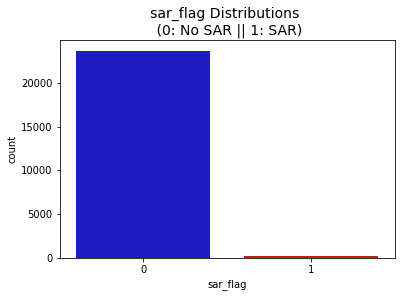

In [9]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('sar_flag', data=df, palette=colors)
plt.title('sar_flag Distributions \n (0: No SAR || 1: SAR)', fontsize=14)

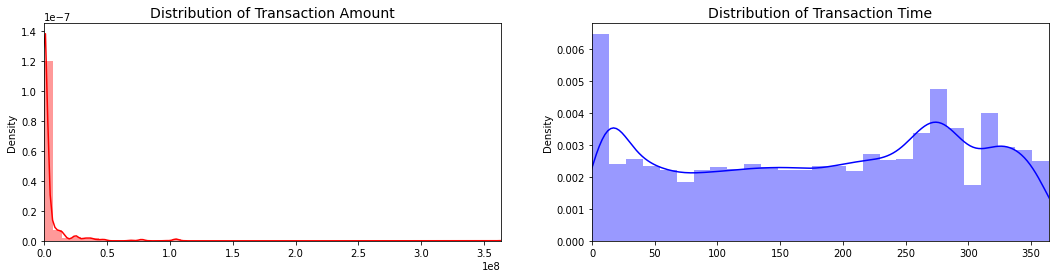

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['amt_sum_by id'].values
time_val = df['alert_date'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

In [11]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['amt_sum_by id'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['alert_date'].values.reshape(-1,1))

df.drop(['alert_date','amt_sum_by id'], axis=1, inplace=True)

In [12]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

df.head()

,scaled_amount,scaled_time,alert_key,sar_flag,cust_id,risk_rank,occupation_code,total_asse,AGE,Pay_amount,...,TR_money_amount,CR,DB,tx_time_weighted,cross_bank_times,ATM_times,info_asset_code_avg,fiscTxId_SUM,txbranch_SUM,Transaction_types
0,0.030877,-1.0,171142,0,a39fea9aec90969fe66a2b2b4d1b86368a2d38e8b8d4bf...,3,12,241719,3,142338,...,0.0,0,0,0,0,0,0.000000,0,0,0.0
1,-0.074539,-1.0,171152,0,7e42b5dca9b28ee8e5545beb834361e90e6197d176b389...,3,13,599497,6,98888,...,0.0,0,0,0,0,0,0.000000,0,0,0.0
2,-0.090359,-1.0,171177,0,a6cdf6302aead77112013168c6d546d2df3bcb551956d2...,1,19,51160,4,0,...,0.0,0,0,0,0,0,0.000000,0,0,0.0
3,9.982241,-1.0,171178,0,1a3efa69705f611c7ef2384a715c8142e2ee801cfec9df...,3,9,3634343,6,11033742,...,2133944.0,8,12,16,3,6,12.888889,261,3,2.0
4,-0.007621,-1.0,171180,0,67f8cbb64dd3d447e992b1b299e0ceed3372188e47c88e...,1,17,4076287,4,76217,...,0.0,0,0,0,0,0,0.000000,0,0,0.0


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

print('No SAR', round(df['sar_flag'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('SAR', round(df['sar_flag'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

X = df.drop('sar_flag', axis=1)
y = df['sar_flag']

sss = StratifiedKFold(n_splits=2, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels


# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

No SAR 99.02 % of the dataset
SAR 0.98 % of the dataset
Train: [ 6958  6988  7050 ... 23903 23904 23905] Test: [    0     1     2 ... 12014 12015 12016]
Train: [    0     1     2 ... 12014 12015 12016] Test: [ 6958  6988  7050 ... 23903 23904 23905]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99021166 0.00978834]
[0.99021166 0.00978834]


In [14]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

df = df.sample(frac=1)

# amount of alert classes 23906 rows.
fraud_df = df.loc[df['sar_flag'] == 1]
non_fraud_df = df.loc[df['sar_flag'] == 0][:23906]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,scaled_amount,scaled_time,alert_key,sar_flag,cust_id,risk_rank,occupation_code,total_asse,AGE,Pay_amount,...,TR_money_amount,CR,DB,tx_time_weighted,cross_bank_times,ATM_times,info_asset_code_avg,fiscTxId_SUM,txbranch_SUM,Transaction_types
9972,-0.064103,-0.184615,242635,0,d57ec736ba1a7876f828fd9052abca5ecb3414ba373a98...,3,15,13005,4,198083,...,0.0,0,0,0,0,0,0.0,0,0,0.0
2753,-0.090359,-0.871795,184116,0,75d3d75506267e8c03152d9194b2cf0c2cb4232c886bf5...,3,9,291010,3,0,...,0.0,0,0,0,0,0,0.0,0,0,0.0
22554,0.945510,0.764103,341653,0,bc619e8d3eb7e0620ce6e9c2c4a11bf18eb10e85a65d1b...,1,3,1207882,5,2131687,...,0.0,0,0,0,0,0,0.0,0,0,0.0
13321,7.401409,0.117949,270971,0,3e545ef65acc218e3454c167a4374773a8ebd3d6748a10...,1,19,14641,3,6885352,...,0.0,0,0,0,0,0,0.0,0,0,0.0
12638,-0.090359,0.061538,264604,0,b772b1b90d9570a5ea4b48994bd1c1cdb0aebc64d3edcf...,1,9,168,3,0,...,49537.0,6,5,13,5,6,11.6,97,4,2.0


Distribution of the Classes in the subsample dataset
0    0.990212
1    0.009788
Name: sar_flag, dtype: float64


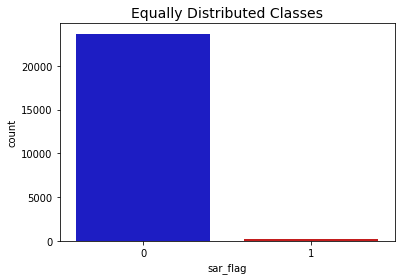

In [15]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['sar_flag'].value_counts()/len(new_df))



sns.countplot('sar_flag', data=new_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

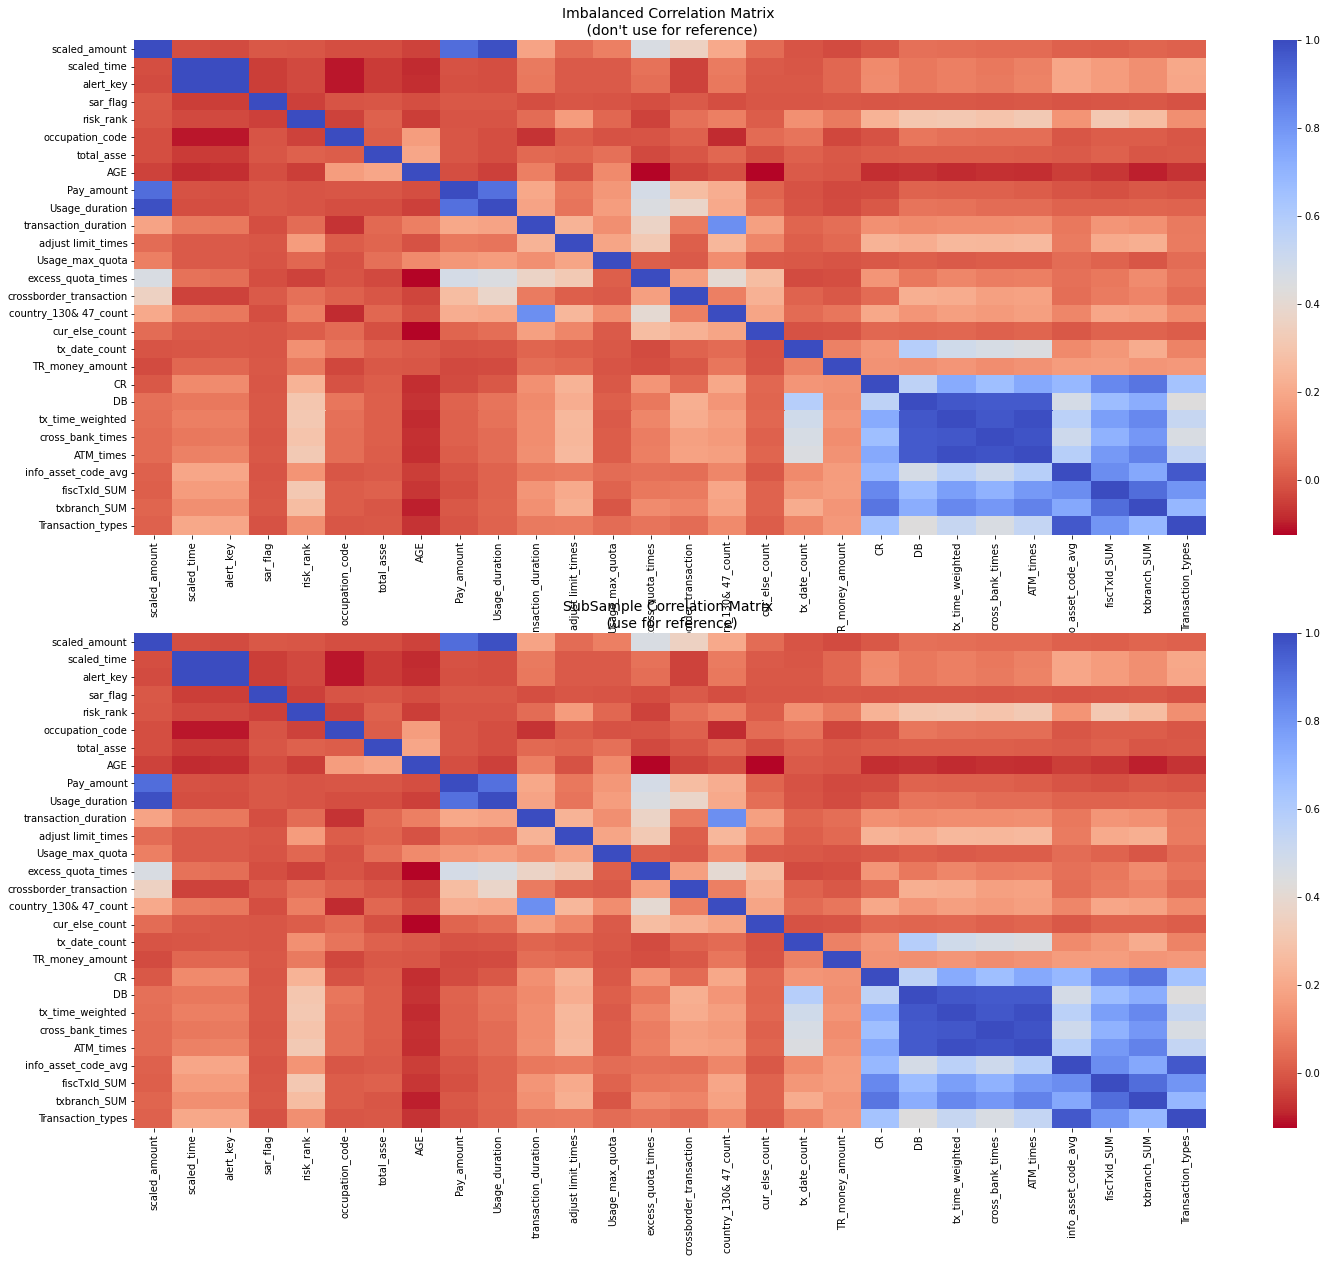

In [16]:
# Make sure we use the subsample in our correlation

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

In [17]:
# New_df is from the random undersample data (fewer instances)
X = new_df.drop('sar_flag', axis=1)
y = new_df['sar_flag']


# T-SNE Implementation
t0 = time.time()
#X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
X_reduced_tsne = TSNE(n_components=2, random_state=42)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
#X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
X_reduced_pca = PCA(n_components=2, random_state=42)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
#X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

T-SNE took 8.6e-05 s
PCA took 7.7e-05 s
Truncated SVD took 8.7e-05 s


In [52]:
# Undersampling before cross validating (prone to overfit)
X = new_df.drop('sar_flag', axis=1).drop('cust_id', axis=1)
y = new_df['sar_flag']

In [19]:
X = new_df.drop('cust_id', axis=1)
y = new_df['cust_id']

In [54]:
# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [56]:
# Let's implement simple classifiers

classifiers = {
   "DecisionTreeClassifier": DecisionTreeClassifier(criterion='entropy'),
   }

#classifiers = {
   #"LogisiticRegression": LogisticRegression(),
   #"KNearest": KNeighborsClassifier(),
   #"Support Vector Classifier": SVC(),
   #"DecisionTreeClassifier": DecisionTreeClassifier(),
   #"XGBClassifier":xgb.XGBClassifier(),
  # }


#LogisticRegression Has a training score of 1.0 % accuracy score
#KNeighborsClassifier Has a training score of 61.0 % accuracy score
#SVC Has a training score of 5.0 % accuracy score
#DecisionTreeClassifier Has a training score of 73.0 % accuracy score

In [60]:
# Wow our scores are getting even high scores even when applying cross validation.
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=4)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  DecisionTreeClassifier Has a training score of 98.0 % accuracy score


In [61]:
CLT = DecisionTreeClassifier()

In [62]:
CLT.fit(X_train, y_train)

DecisionTreeClassifier()

In [63]:
test_unlabel = pd.read_csv('/content/test_data2.csv')

In [33]:
test_unlabel1 = test_unlabel.drop('cust_id', axis=1)

In [44]:
test_unlabel1.head(2)

,alert_key,alert_date,risk_rank,occupation_code,total_asse,AGE,Pay_amount,Usage_duration,transaction_duration,adjust limit_times,...,TR_money_amount,CR,DB,tx_time_weighted,cross_bank_times,ATM_times,info_asset_code_avg,fiscTxId_SUM,txbranch_SUM,Transaction_types
0,352249,0,1,19,1465816,7,0,0,0,0,...,8.108920e+09,8,13,23,2,8,10.833333,124,3,2.0
1,352253,0,1,2,98177,2,21581,16184,13,0,...,2.649638e+09,6,15,19,3,11,10.166667,305,11,1.5


In [36]:
test_unlabel1_values = test_unlabel1.values

In [45]:
print(test_unlabel1_values[1:2])

[[3.52253000e+05 0.00000000e+00 1.00000000e+00 2.00000000e+00
  9.81770000e+04 2.00000000e+00 2.15810000e+04 1.61840000e+04
  1.30000000e+01 0.00000000e+00 1.74655000e+05 0.00000000e+00
  8.00000000e+00 2.22060000e+04 1.00000000e+00 0.00000000e+00
  3.90000000e+02 2.64963822e+09 6.00000000e+00 1.50000000e+01
  1.90000000e+01 3.00000000e+00 1.10000000e+01 1.01666667e+01
  3.05000000e+02 1.10000000e+01 1.50000000e+00]]


In [64]:
model = CLT.predict(test_unlabel1_values)

In [67]:
#results = KNN.predict(test_X)
with open('predict.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['alert_key','label'])
    for i, x in enumerate(model):
      writer.writerow([i + 1, int(x)])

In [68]:
probs = CLT.predict_proba(test_unlabel1_values)

In [69]:
print(probs)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [70]:
#results = KNN.predict(test_X)
with open('predict.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['alert_key','label'])
    for i, x in enumerate(probs):
      writer.writerow([i + 1, int(x)])

TypeError: ignored